<a href="https://colab.research.google.com/github/Vamshi-Nallaguntla/DeepLearning_Assignment_1/blob/main/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                #numpy is used for data manipulation and preparing inputs
import matplotlib.pyplot as plt                   #matplotlib is used to generate graphs needed for the assignment
import time                                       #to track the training time for each epoch
import tensorflow as tf                           #tensorflow has keras from where MNIST dataset can be loaded
from tensorflow.keras.datasets import mnist       #from keras I will import mnist to load in this program
from tensorflow.keras.models import Sequential    #to stack or arrange the layers (input layer -> hidden layers -> output layer) using sequential
from tensorflow.keras.layers import Dense         #represents a fully connected layer in our FCNN
from tensorflow.keras.layers import Flatten       #to flatten 2D (28X28 Pixel images) into a 1D vector (784 values)
from tensorflow.keras.utils import to_categorical #to convert the target labels into a one-hot encoded vector
from tensorflow.keras.callbacks import Callback   #to create a callback to measure tthe time taken for each epoch

In [ ]:
#loading the MNIST dataset, I am splitting the dataset into training and test sets
# x_train and x_test are input data (images)
# y_train and y_test are the labels (digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing the data, our input is 2D Data (28x28 pixels) and i am converting it to 1D Vector (784 Values)
# astype() method returns a new DataFrame where the data types has been changed to the specified type
# Normalization: pixel values range from 0 to 255, normalized to the range [0,1] by dividing by 255
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# to_categorical is used to One-hot encode labels
# The labels for the digits (0-9) are converted to one- hot encode labels
# ex: [0,0,0,1,0,0,0,0,0,0] this means the label '3'
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Custom callback to track training time, training error, and validation (testing) error
class TimeAndErrorHistory(Callback):       #Callbacks in Keras are special functions that are executed at certain points like at the start or end of an epoch during training
    def on_train_begin(self, logs={}):     #This method is called at the beginning of the training process.
        self.times = []
        self.train_errors = []
        self.val_errors = []
        self.start_time = time.time()

    def on_epoch_begin(self, epoch, logs={}):  #This method is called at the beginning of each epoch to note the start time
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}): # This method is used at the end of each epoch to calculate the end time
        epoch_time = time.time() - self.epoch_time_start
        self.times.append(epoch_time)

        # To Calculate the training error, we use the formula training error = (1 - training accuracy)
        train_accuracy = logs.get('accuracy')
        training_error = 1 - train_accuracy
        self.train_errors.append(training_error)

        # To Calculate validation (testing) error --> (1 - validation accuracy)
        val_accuracy = logs.get('val_accuracy')
        validation_error = 1 - val_accuracy
        self.val_errors.append(validation_error)


In [ ]:
# model_a
# Using 'relu' activation function for hidden layers and 'SoftMax' activation function for output layer
model_a = Sequential([
    Dense(64, input_shape=(784,), activation='relu'), #hidden layer 1
    Dense(128, activation='relu'),                    #hidden layer 2
    Dense(64, activation='relu'),                     #hidden layer 3
    Dense(10, activation='softmax')                   #output layer
])

# Compile the model
# loss function: Categorical cross-Entropy
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Instantiate the callback
time_error_callback_a = TimeAndErrorHistory()

# Train the model
# model_a.fit() used to train the neural network model (model_a) on the training data (x_train, y_train)
# validation_data=(x_test, y_test)
#history object is used for plotting training and validation loss/accuracy graphs and model performance evaluation
history_a = model_a.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test), callbacks=[time_error_callback_a])

# Calculate cumulative training time
cumulative_times_a = [sum(time_error_callback_a.times[:i+1]) for i in range(len(time_error_callback_a.times))]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.5313 - val_accuracy: 0.9525 - val_loss: 0.1576
Epoch 2/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9585 - loss: 0.1339 - val_accuracy: 0.9644 - val_loss: 0.1181
Epoch 3/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9716 - loss: 0.0908 - val_accuracy: 0.9710 - val_loss: 0.0938
Epoch 4/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.0671 - val_accuracy: 0.9715 - val_loss: 0.0869
Epoch 5/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9698 - val_loss: 0.0992
Epoch 6/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9746 - val_loss: 0.0834
Epoch 7/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9754 - val_loss: 0.0913
Epoch 8/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accu

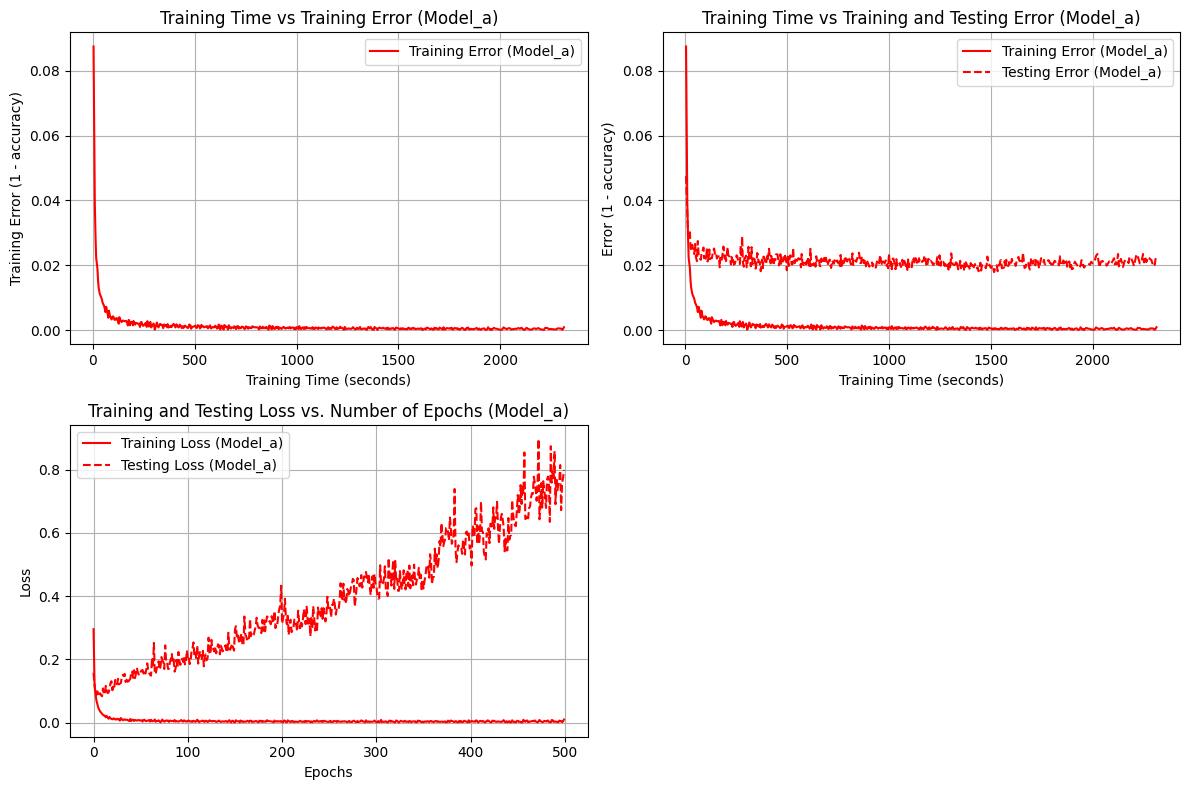

In [ ]:
# Graph 1: Training Time (x-axis) vs Training Error(y-axis) for model_a
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(cumulative_times_a, time_error_callback_a.train_errors, label='Training Error (Model_a)', color='red') #using red colored line
plt.title('Training Time vs Training Error (Model_a)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Training Error (1 - accuracy)')
plt.legend()
plt.grid(True)

# Graph 2: Training Time(x-axis) vs Training Error and Testing Error (y-axis) for model_a
plt.subplot(2, 2, 2)
plt.plot(cumulative_times_a, time_error_callback_a.train_errors, label='Training Error (Model_a)', color='red') #using red colored line
plt.plot(cumulative_times_a, time_error_callback_a.val_errors, label='Testing Error (Model_a)', linestyle='--', color='red') #using dashed and red colored line
plt.title('Training Time vs Training and Testing Error (Model_a)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Error (1 - accuracy)')
plt.legend()
plt.grid(True)

# Graph 3: Training and Testing Loss(y-axis) vs Epochs (x-axis)
plt.subplot(2, 2, 3)
plt.plot(history_a.history['loss'], label='Training Loss (Model_a)', color='red') #using red colored line
plt.plot(history_a.history['val_loss'], label='Testing Loss (Model_a)', linestyle='--', color='red') # using red dashed line
plt.title('Training and Testing Loss vs. Number of Epochs (Model_a)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# model_b
# Using 'relu' activation function for hidden layers and 'SoftMax' activation function for output layer
model_b = Sequential([
    Dense(256, input_shape=(784,), activation='relu'), #hidden layer 1
    Dense(512, activation='relu'),                      #hidden layer 2
    Dense(128, activation='relu'),                      #hidden layer 3
    Dense(10, activation='softmax')                    #output layer
])

# Compile the model
# loss function: Categorical cross-Entropy
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Instantiate the callback
time_error_callback_b = TimeAndErrorHistory()

# Train the model
# model_b.fit() used to train the neural network model (model_b) on the training data (x_train, y_train)
# validation_data=(x_test, y_test)
#history object is used for plotting training and validation loss/accuracy graphs and model performance evaluation
history_b = model_b.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test), callbacks=[time_error_callback_b])

# Calculate cumulative training time
cumulative_times_b = [sum(time_error_callback_b.times[:i+1]) for i in range(len(time_error_callback_b.times))]


Epoch 1/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8868 - loss: 0.3803 - val_accuracy: 0.9655 - val_loss: 0.1111
Epoch 2/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9723 - loss: 0.0877 - val_accuracy: 0.9736 - val_loss: 0.0893
Epoch 3/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9817 - loss: 0.0573 - val_accuracy: 0.9782 - val_loss: 0.0752
Epoch 4/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9863 - loss: 0.0425 - val_accuracy: 0.9802 - val_loss: 0.0642
Epoch 5/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9768 - val_loss: 0.0863
Epoch 6/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9795 - val_loss: 0.0756
Epoch 7/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9795 - val_loss: 0.0741
Epoch 8/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9930 - loss: 0.0212

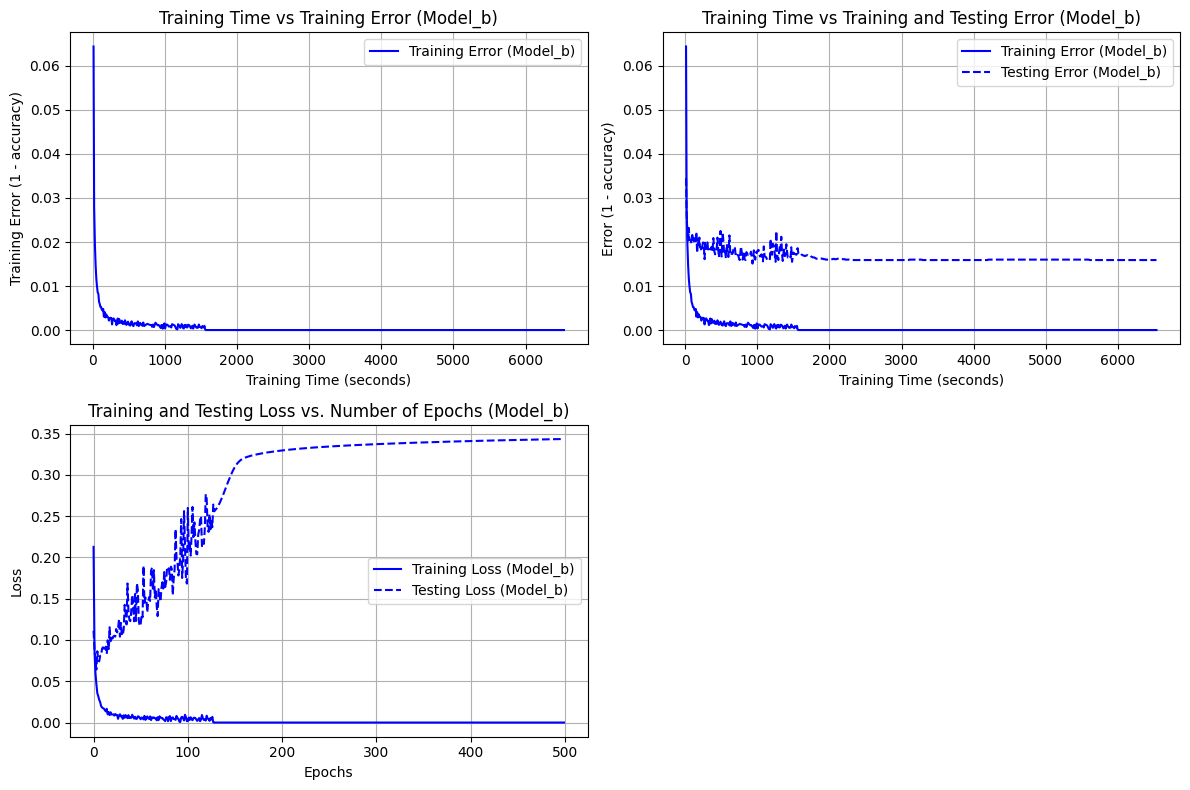

In [ ]:
# Graph 4: Training Time(x-axis) vs Training Error(y-axis) for model_b
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(cumulative_times_b, time_error_callback_b.train_errors, label='Training Error (Model_b)', color='blue') # blue colored line
plt.title('Training Time vs Training Error (Model_b)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Training Error (1 - accuracy)')  # error= 1-accuracy
plt.legend()
plt.grid(True)

# Graph 5: Training Time(x-axis) vs Training Error and Testing Error(y-axis) for model_b
plt.subplot(2, 2, 2)
plt.plot(cumulative_times_b, time_error_callback_b.train_errors, label='Training Error (Model_b)', color='blue') #blue colored line
plt.plot(cumulative_times_b, time_error_callback_b.val_errors, label='Testing Error (Model_b)', linestyle='--', color='blue') #blue colored dashed line
plt.title('Training Time vs Training and Testing Error (Model_b)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Error (1 - accuracy)') #error = 1-accuracy
plt.legend()
plt.grid(True)

# Graph 6: Training and Testing Loss(y-axis) vs Epochs(x-axis) for model_b
plt.subplot(2, 2, 3)
plt.plot(history_b.history['loss'], label='Training Loss (Model_b)', color='blue') #blue colored line
plt.plot(history_b.history['val_loss'], label='Testing Loss (Model_b)', linestyle='--', color='blue') #blue colored dashed line
plt.title('Training and Testing Loss vs. Number of Epochs (Model_b)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

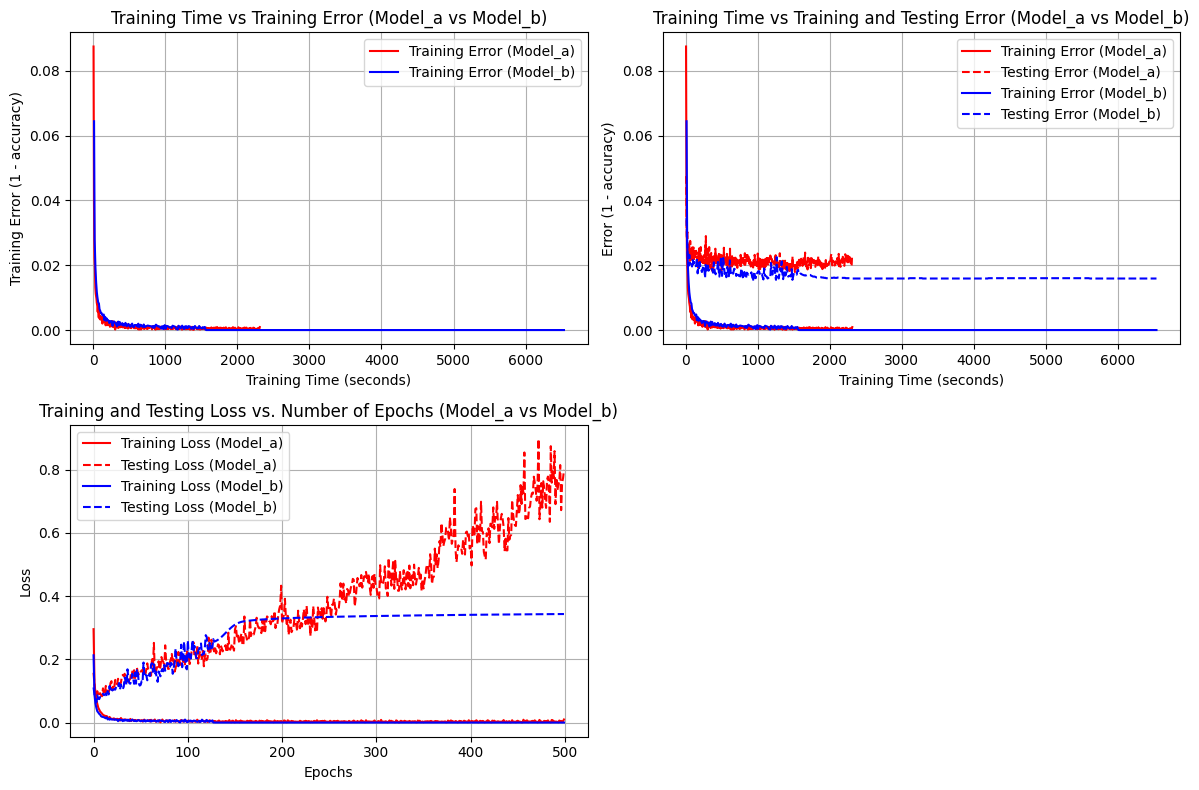

In [ ]:
# Model_a vs Model_b

# Graph 7: Training Time(x-axis) vs Training Error(y-axis) for both model_a and model_b
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(cumulative_times_a, time_error_callback_a.train_errors, label='Training Error (Model_a)', color='red') #red colored line
plt.plot(cumulative_times_b, time_error_callback_b.train_errors, label='Training Error (Model_b)', color='blue') #blue colored line
plt.title('Training Time vs Training Error (Model_a vs Model_b)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Training Error (1 - accuracy)') #error=1-accuracy
plt.legend()
plt.grid(True)

# Plot 8: Training Time(x-axis) vs Training Error and Testing Error(y-axis) for model_a and model_b
plt.subplot(2, 2, 2)
plt.plot(cumulative_times_a, time_error_callback_a.train_errors, label='Training Error (Model_a)', color='red') #red colored line
plt.plot(cumulative_times_a, time_error_callback_a.val_errors, label='Testing Error (Model_a)', linestyle='--', color='red') #red colored dashed line
plt.plot(cumulative_times_b, time_error_callback_b.train_errors, label='Training Error (Model_b)', color='blue') #blue colored line
plt.plot(cumulative_times_b, time_error_callback_b.val_errors, label='Testing Error (Model_b)', linestyle='--', color='blue') #blue colored dashed line
plt.title('Training Time vs Training and Testing Error (Model_a vs Model_b)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Error (1 - accuracy)') #error = 1- accuracy
plt.legend()
plt.grid(True)

# Plot 9: Training and Testing Loss (y-axis) vs number of epochs(x-axis) for model_a and model_b
plt.subplot(2, 2, 3)
plt.plot(history_a.history['loss'], label='Training Loss (Model_a)', color='red') #red colored line
plt.plot(history_a.history['val_loss'], label='Testing Loss (Model_a)', linestyle='--', color='red') #red colored dashed line
plt.plot(history_b.history['loss'], label='Training Loss (Model_b)', color='blue') #blue colored line
plt.plot(history_b.history['val_loss'], label='Testing Loss (Model_b)', linestyle='--', color='blue') #blue colored line
plt.title('Training and Testing Loss vs. Number of Epochs (Model_a vs Model_b)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# To find Training accuracy and Testing accuracy
print("Training Accuracy - Model_a:", max(history_a.history['accuracy'])) # to find the best training accuracy achieved for an epoch in model_a
print("Training Accuracy - Model_b:", max(history_b.history['accuracy'])) # to find the best training accuracy achieved for an epoch in model_b

print("Testing Accuracy - Model_a:", max(history_a.history['val_accuracy'])) #to find the best testing accuracy achieved for an epoch in model_a
print("Testing Accuracy - Model_b:", max(history_b.history['val_accuracy'])) #to find the best testing accuracy achieved for an epoch in model_b

Training Accuracy - Model_a: 0.9999499917030334
Training Accuracy - Model_b: 1.0
Testing Accuracy - Model_a: 0.9821000099182129
Testing Accuracy - Model_b: 0.9848999977111816


In [ ]:
# To find Training loss and Testing loss
print("Training Loss - Model_a:", min(history_a.history['loss'])) # to find the lowest training loss occured for an epoch in model_a
print("Training Loss - Model_b:", min(history_b.history['loss'])) # to find the lowest training loss occured for an epoch in model_b

print("Testing Loss - Model_a:", min(history_a.history['val_loss'])) # to find the lowest testing loss occured for an epoch in model_a
print("Testing Loss - Model_b:", min(history_b.history['val_loss'])) # to find the lowest testing loss occured for an epoch in model_b

Training Loss - Model_a: 0.00012653382145799696
Training Loss - Model_b: 0.0
Testing Loss - Model_a: 0.08327233791351318
Testing Loss - Model_b: 0.06417370587587357


In [ ]:
#to find the difference between best training accuracy and best validation(test) accuracy
#to find which model generalizes better
gap_a = max(history_a.history['accuracy']) - max(history_a.history['val_accuracy']) # for model_a
gap_b = max(history_b.history['accuracy']) - max(history_b.history['val_accuracy']) # for model_b

if gap_a < gap_b:
    print("Model_a generalizes better")
else:
    print("Model_b generalizes better")


Model_b generalizes better


In [ ]:
#to find the total running time of the models
train_time_a = sum(time_error_callback_a.times) # for model_a
train_time_b = sum(time_error_callback_b.times) # for model_b

print(f"Model_a total training time: {train_time_a}")
print(f"Model_b total training time: {train_time_b}")


Model_a total training time: 2311.5374891757965
Model_b total training time: 6533.145178794861
